# Modélisation du nombre de buts par une loi de Poisson

In [1]:
%matplotlib inline

In [2]:
import pandas

On importe les données de la ligue 1 française

In [3]:
data = pandas.read_csv('data\\engsoccerdata-master\\data-raw\\france.csv', index_col=0, parse_dates=[1], infer_datetime_format=True)

In [4]:
data.head(6)

,Date,Season,home,visitor,FT,hgoal,vgoal,division,tier,totgoal,goaldif,result
1,1933-07-01,1932,CA Paris (alt),AS Cannes,5-1,5,1,1,1,6,4,H
2,1933-07-01,1932,SC Fives Lille,FC Sete,4-2,4,2,1,1,6,2,H
3,1933-07-01,1932,Olympique Marseille,OGC Nice,4-0,4,0,1,1,4,4,H
4,1933-07-01,1932,SC Nimes,Olympique Lillois Lille,3-3,3,3,1,1,6,0,D
5,1933-07-01,1932,FC Antibes,Stade Rennes,1-1,1,1,1,1,2,0,D
6,1933-07-01,1932,Stade Olympique Montpellierain,Racing Club de France,1-0,1,0,1,1,1,1,H


Affichons l'évolution du nombre de buts par match au fur et à mesure des années

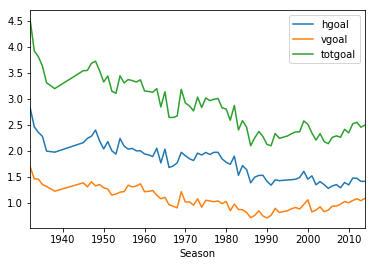

In [5]:
data.groupby(by=data.Season)["hgoal","vgoal","totgoal"].mean().plot()

Affichons l'histogramme des buts marqués pour une année (1932 et 2014 par exemple)

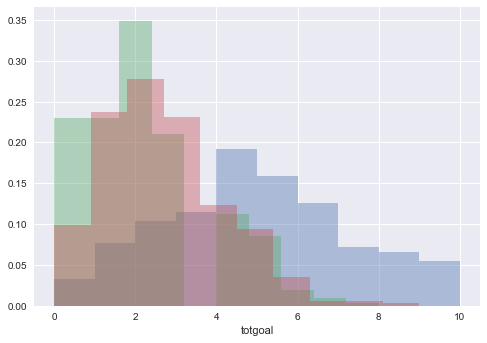

In [6]:
import seaborn as sns

[sns.distplot(data[data.Season == i].totgoal, kde=False, bins = 10, norm_hist=True) for i in (1932, 1990, 2014)]

On remarque que les distributions ressemblent à celle d'une loi de Poisson. Calculons la

In [7]:
print(data[data.Season == 1932].totgoal.mean())
print(data[data.Season == 1990].totgoal.mean())
print(data[data.Season == 2014].totgoal.mean())

4.50549450549
2.11842105263
2.49210526316


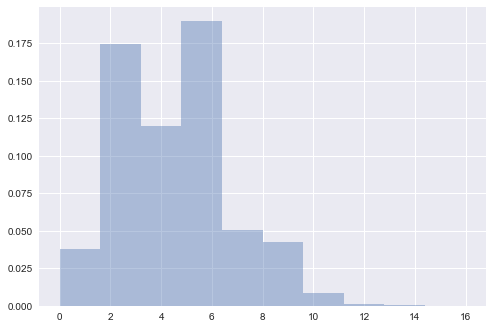

In [8]:
import scipy
data1 = scipy.stats.poisson.rvs(mu=4.505, size=10000)
data2 = scipy.stats.poisson.rvs(mu=2.49, size=10000)

sns.distplot(data1, kde=False, bins = 10,norm_hist=True)

# Comparaison par pays

On va aussi afficher l'évolution du nombre de buts moyen par match en fonction des championnats. Pour cela, on récupère cette information sur chacun des datasets fourni

In [35]:
france = pandas.read_csv('data\\engsoccerdata-master\\data-raw\\france.csv', index_col=0, parse_dates=[1], infer_datetime_format=True)
france['totgoal_france'] = france['totgoal']

england = pandas.read_csv('data\\engsoccerdata-master\\data-raw\\england.csv', parse_dates=[0], infer_datetime_format=True)
england['totgoal_england'] = england.hgoal + england.vgoal

germany = pandas.read_csv('data\\engsoccerdata-master\\data-raw\\germany.csv', parse_dates=[0], infer_datetime_format=True)
germany['totgoal_germany'] = germany.hgoal + germany.vgoal

holland = pandas.read_csv('data\\engsoccerdata-master\\data-raw\\holland.csv', parse_dates=[0], infer_datetime_format=True)
holland['totgoal_holland'] = holland.hgoal + holland.vgoal

italy = pandas.read_csv('data\\engsoccerdata-master\\data-raw\\italy.csv', parse_dates=[0], infer_datetime_format=True)
italy['totgoal_italy'] = italy.hgoal + italy.vgoal

spain = pandas.read_csv('data\\engsoccerdata-master\\data-raw\\spain.csv', parse_dates=[0], infer_datetime_format=True)
spain['totgoal_spain'] = spain.hgoal + spain.vgoal

On aggrège par année chaque dataset

In [36]:
spain = spain[['Season','totgoal_spain']].groupby('Season').mean()
france = france[['Season','totgoal_france']].groupby('Season').mean()
england = england[['Season','totgoal_england']].groupby('Season').mean()
germany = germany[['Season','totgoal_germany']].groupby('Season').mean()
holland = holland[['Season','totgoal_holland']].groupby('Season').mean()
italy = italy[['Season','totgoal_italy']].groupby('Season').mean()

Et on rassemble toutes les données dans un unique dataframe

In [40]:
total = france
total = total.merge(spain, left_index=True, right_index=True, how ='outer')
total = total.merge(england, left_index=True, right_index=True, how ='outer')
total = total.merge(italy, left_index=True, right_index=True, how ='outer')
total = total.merge(holland, left_index=True, right_index=True, how ='outer')
total = total.merge(germany, left_index=True, right_index=True, how ='outer')

Finalement, on plot le tout

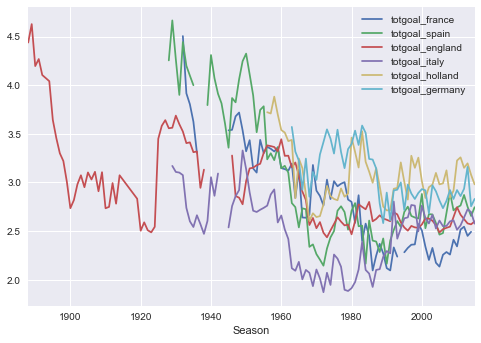

In [41]:
total.plot()